In [1]:
!pip install bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.9 MB/s eta 0:00:00


In [3]:
%%writefile COVID-19.ncbi_list.200301.txt
GenBank	RefSeq	Gene Region	Collection Date	Locality
MN908947	NC_045512	complete	Dec-19	China
LC522972		complete	Jan-20	Japan
LC522973		complete	Jan-20	Japan
LC522974		complete	Jan-20	Japan
LC522975		complete	Jan-20	Japan
LR757995		complete	05-Jan-20	China: Wuhan
LR757996		complete	01-Jan-20	China: Wuhan
LR757998		complete	26-Dec-19	China: Wuhan
MN938384		complete	10-Jan-20	China: Shenzhen
MN975262		complete	11-Jan-20	China
MN985325		complete	19-Jan-20	USA: WA
MN988668		complete	02-Jan-20	China
MN988669		complete	02-Jan-20	China
MN988713		complete	21-Jan-20	USA: IL
MN994467		complete	23-Jan-20	USA: CA
MN994468		complete	22-Jan-20	USA: CA
MN996527		complete	30-Dec-19	China: Wuhan
MN996528		complete	30-Dec-19	China: Wuhan
MN996529		complete	30-Dec-19	China: Wuhan
MN996530		complete	30-Dec-19	China: Wuhan
MN996531		complete	30-Dec-19	China: Wuhan
MN997409		complete	22-Jan-20	USA: AZ
MT007544		complete	25-Jan-20	Australia: Victoria
MT019529		complete	23-Dec-19	China: Wuhan
MT019530		complete	30-Dec-19	China: Wuhan
MT019531		complete	30-Dec-19	China: Wuhan
MT019532		complete	30-Dec-19	China: Wuhan
MT019533		complete	01-Jan-20	China: Wuhan
MT020880		complete	25-Jan-20	USA: WA
MT020881		complete	25-Jan-20	USA: WA
MT027062		complete	29-Jan-20	USA: CA
MT027063		complete	29-Jan-20	USA: CA
MT027064		complete	29-Jan-20	USA: CA
MT039873		complete	20-Jan-20	China: Hangzhou
MT039887		complete	31-Jan-20	USA: WI
MT039888		complete	29-Jan-20	USA: MA
MT039890		complete	Jan-20	South Korea
MT044257		complete	28-Jan-20	USA: IL
MT044258		complete	27-Jan-20	USA: CA
MT049951		complete	17-Jan-20	China: Yunnan
MT066175		complete	31-Jan-20	Taiwan
MT066176		complete	05-Feb-20	Taiwan
MT072688		complete	13-Jan-20	Nepal
MT093571		complete	07-Feb-20	Sweden
MT093631		complete	08-Jan-20	China
MT106052		complete	06-Feb-20	USA: CA
MT106053		complete	10-Feb-20	USA: CA
MT106054		complete	11-Feb-20	USA: TX
MT118835		complete	23-Feb-20	USA: CA
LR757997		complete, gapped	31-Dec-19	China: Wuhan
MT020781		complete, gapped	29-Jan-20	Finland
MT008022		M	Jan-20	Italy: Rome
MT008023		M	Jan-20	Italy: Rome
LC523807		N	06-Jan-20	Philippines
LC523808		N	26-Jan-20	Philippines
LC523809		N	23-Jan-20	Philippines
MT081059		N	22-Jan-20	China: HuaShang
MT081060		N	23-Jan-20	China: HuaShang
MT081061		N	23-Jan-20	China: HuaShang
MT081062		N	25-Jan-20	China: HuaShang
MT081063		N	26-Jan-20	China: HuaShang
MT081064		N	28-Jan-20	China: HuaShang
MT081065		N	30-Jan-20	China: HuaShang
MT081066		N	30-Jan-20	China: HuaShang
MT081067		N	31-Jan-20	China: HuaShang
MT081068		N	06-Feb-20	China: HuaShang
MT072667		nsp1-nsp2	03-Feb-20	Belgium
MT111895		NSP3	Feb-20	Australia: QLD
MT111896		ORF3a/E	Feb-20	Australia: QLD
LC522350		RdRP	26-Jan-20	Philippines
MN938385		RdRP	Jan-20	China: Shenzhen
MN938386		RdRP	Jan-20	China: Shenzhen
MN970003		RdRP	08-Jan-20	Thailand
MN970004		RdRP	13-Jan-20	Thailand
MN975263		RdRP	Jan-20	China
MN975264		RdRP	Jan-20	China
MN975265		RdRP	Jan-20	China
MT042773		RdRp	Jan-20	China: Wuhan
MT042774		RdRp	Jan-20	China: Wuhan
MT042775		RdRp	Jan-20	China: Wuhan
MT042776		RdRp	Jan-20	China: Wuhan
MT042777		RdRp	Jan-20	China: Wuhan
MT042778		RdRp	Jan-20	China: Wuhan
MT050414		RdRP	Jan-20	Australia: QLD
MT050415		RdRP	Jan-20	Australia: QLD
MT050416		RdRP	Jan-20	Australia: QLD
MT050417		RdRP	Jan-20	Australia: QLD
MT066157		RdRp	24-Jan-20	Malaysia
MT066158		RdRp	24-Jan-20	Malaysia
MT066159		RdRp	24-Jan-20	Malaysia
MT072668		RdRp	03-Feb-20	Belgium
MN938387		S	Jan-20	China: Shenzhen
MN938388		S	Jan-20	China: Shenzhen
MN938389		S	Jan-20	China: Shenzhen
MN938390		S	Jan-20	China: Shenzhen
MN975266		S	Jan-20	China
MN975267		S	Jan-20	China
MN975268		S	Jan-20	China

Writing COVID-19.ncbi_list.200301.txt


In [4]:
from Bio import Entrez
from Bio import SeqIO
import pandas as pd

def fetch_record(genbank_id):
    Entrez.email = "your_email@email.com"
    handle = Entrez.efetch(db="nucleotide", id=genbank_id, \
                           rettype="gb", retmode="xml")
    records = Entrez.read(handle)
    return records

def write_sequence(genbank_id, records):
    print("## processing: "+genbank_id)
    record_id = records[0]["GBSeq_accession-version"]
    record_desc = records[0]["GBSeq_definition"]
    record_seq = records[0]["GBSeq_sequence"]
    with open(genbank_id+".fasta",'w') as fw:
        fw.write(">"+record_id+" "+record_desc+"\n")
        fw.write(record_seq)

def read_table(file):
    df = pd.read_csv(file, sep="\t")
    return df

file = "COVID-19.ncbi_list.200301.txt"
df = read_table(file)
complete_df = df[df["Gene Region"]=="complete"]
genbank_id_list = complete_df["GenBank"]

for genbank_id in genbank_id_list:
    records = fetch_record(genbank_id)
    write_sequence(genbank_id, records)

## processing: MN908947
## processing: LC522972
## processing: LC522973
## processing: LC522974
## processing: LC522975
## processing: LR757995
## processing: LR757996
## processing: LR757998
## processing: MN938384
## processing: MN975262
## processing: MN985325
## processing: MN988668
## processing: MN988669
## processing: MN988713
## processing: MN994467
## processing: MN994468
## processing: MN996527
## processing: MN996528
## processing: MN996529
## processing: MN996530
## processing: MN996531
## processing: MN997409
## processing: MT007544
## processing: MT019529
## processing: MT019530
## processing: MT019531
## processing: MT019532
## processing: MT019533
## processing: MT020880
## processing: MT020881
## processing: MT027062
## processing: MT027063
## processing: MT027064
## processing: MT039873
## processing: MT039887
## processing: MT039888
## processing: MT039890
## processing: MT044257
## processing: MT044258
## processing: MT049951
## processing: MT066175
## processing: M

In [31]:
!awk 'FNR==1 && NR!=1 {print ""}1' *.fasta > covid.all.fasta

In [35]:
!head -15 covid.all.fasta > covid.crop.fasta

In [7]:
!wget https://drive5.com/muscle/downloads3.8.31/muscle3.8.31_i86linux64.tar.gz
!tar -zxvf muscle3.8.31_i86linux64.tar.gz

--2023-11-15 12:49:32--  https://drive5.com/muscle/downloads3.8.31/muscle3.8.31_i86linux64.tar.gz
Resolving drive5.com (drive5.com)... 199.195.116.69
Connecting to drive5.com (drive5.com)|199.195.116.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487906 (476K) [application/x-gzip]
Saving to: ‘muscle3.8.31_i86linux64.tar.gz’

muscle3.8.31_i86lin 100%[===================>] 476.47K  --.-KB/s    in 0.08s   

2023-11-15 12:49:33 (5.54 MB/s) - ‘muscle3.8.31_i86linux64.tar.gz’ saved [487906/487906]



In [37]:
from Bio.Align.Applications import MuscleCommandline

muscle = "./muscle3.8.31_i86linux64"

cmd_line = MuscleCommandline(muscle, \
                             input="covid.crop.fasta", \
                             out="covid.crop.aln", \
                            clw=" ")

print(cmd_line)
stdout, stderr = cmd_line()

./muscle3.8.31_i86linux64 -in covid.crop.fasta -out covid.crop.aln -clw


In [40]:
seq_dict = dict()

with open("covid.crop.aln",'r') as fr:
    for line in fr:
        if line.startswith("MUSCLE"):
            continue
        if "*" in line:
            continue
        l = line.strip().split()
        if l:
            genbank_id = l[0]
            seq = l[1]
            if genbank_id not in seq_dict:
                seq_dict[genbank_id] = seq
            else:
                seq_dict[genbank_id] += seq

with open("covid.aln.fasta",'w') as fw:
    for k,v in seq_dict.items():
        fw.write(">"+k+"\n")
        fw.write(v+"\n")

https://weblogo.threeplusone.com/create.cgi

In [41]:
!wget http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!tar -zxvf clustalw-2.1-linux-x86_64-libcppstatic.tar.gz

--2023-11-15 13:32:23--  http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
Resolving www.clustal.org (www.clustal.org)... 137.43.93.206
Connecting to www.clustal.org (www.clustal.org)|137.43.93.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2468744 (2.4M) [application/x-gzip]
Saving to: ‘clustalw-2.1-linux-x86_64-libcppstatic.tar.gz’

clustalw-2.1-linux- 100%[===================>]   2.35M  2.52MB/s    in 0.9s    

2023-11-15 13:32:25 (2.52 MB/s) - ‘clustalw-2.1-linux-x86_64-libcppstatic.tar.gz’ saved [2468744/2468744]

clustalw-2.1-linux-x86_64-libcppstatic/
clustalw-2.1-linux-x86_64-libcppstatic/clustalw_help
clustalw-2.1-linux-x86_64-libcppstatic/clustalw2


In [49]:
!./clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 -infile=covid.all.fasta -tree -outputtree=phylip -clustering=Neighbour-joining




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: LC522972.1 29878 bp
Sequence 2: LC522973.1 29878 bp
Sequence 3: LC522974.1 29878 bp
Sequence 4: LC522975.1 29878 bp
Sequence 5: LR757995.1 29872 bp
Sequence 6: LR757996.1 29868 bp
Sequence 7: LR757998.1 29866 bp
Sequence 8: MN908947.3 29903 bp
Sequence 9: MN938384.1 29838 bp
Sequence 10: MN975262.1 29891 bp
Sequence 11: MN985325.1 29882 bp
Sequence 12: MN988668.1 29881 bp
Sequence 13: MN988669.1 29881 bp
Sequence 14: MN988713.1 29882 bp
Sequence 15: MN994467.1 29882 bp
Sequence 16: MN994468.1 29883 bp
Sequence 17: MN996527.1 29825 bp
Sequence 18: MN996528.1 29891 bp
Sequence 19: MN996529.1 29852 bp
Sequence 20: MN996530.1 29854 bp
Sequence 21: MN996531.1 29857 bp
Sequence 22: MN997409.1 29882 bp
Sequence 23: MT007544.1 29893 bp
Sequence 24: MT019529.1 29899 bp
Sequence 25: MT019530.1 29889 bp
Sequence 26: MT019531.1 29899 bp
Sequence 27: MT019532.1 29890 bp
Sequence 28: MT019533.1 29883 bp
Sequence 29

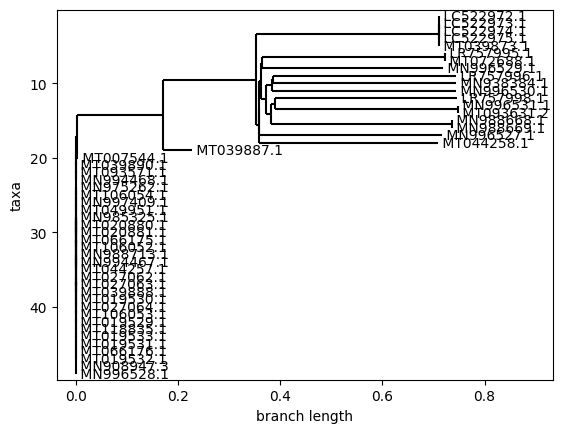

In [50]:
from Bio import Phylo

tree = Phylo.read("covid.all.ph","newick")
Phylo.draw(tree)